# Introdução

A análise abaixo foi realizada utilizando dados públicos sobre automóveis disponibilizados no site https://www.kaggle.com/.

Nosso objetivo é entender um pouco sobre como os dados estão distribuidos no dataset, buscando alguns insights que possam ser úteis em uma eventual tomada de decisão.

Análises que serão feitas ao decorrer do notebook:
- Distribuição de Veículos com base no ano de registro, câmbio, idade e tipo
- Variação da faixa de preço pelo tipo de veículo
- Contagem total de veículos à venda conforme o tipo de veículo
- Preço de veículos pertencentes a cada marca
- Preço de veículos relacionado com a idade
- Preço médio dos veículos com base no tipo de veículo, bem como no tipo de câmbio
- Preço médio do veículo por tipo de combustível e tipo de câmbio
- Potência média de um veículo por tipo de veículo e tipo de câmbio
- Média de preço por marca e veículo

# 1. Carregando Bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregando e Inspecionando o Dataset

In [2]:
df = pd.read_csv("autos.csv")
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


In [3]:
df.tail(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
313677,2016-04-04 09:57:12,Volkswagen_Lupo_1.0,privat,Offer,1490,control,kleinwagen,1998,manuell,50,...,48653,2016-04-06 11:17:13,2016,2016,April,April,2,11,18,3
313678,2016-03-28 13:48:07,Volkswagen_Golf_2.0_TDI_DPF_Team,privat,Offer,7900,test,limousine,2010,manuell,140,...,75223,2016-04-02 18:16:20,2016,2016,March,March,5,18,6,5
313679,2016-04-02 20:37:03,Bmw_320_D_DPF_Touring_!!!,privat,Offer,3999,test,kombi,2005,manuell,3,...,81825,2016-04-06 20:47:12,2016,2016,April,April,4,20,11,7
313680,2016-03-19 19:53:49,turbo_defekt,privat,Offer,3200,control,limousine,2004,manuell,225,...,96465,2016-03-19 20:44:43,2016,2016,March,March,0,20,12,7
313681,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Offer,1150,control,bus,2000,manuell,0,...,26624,2016-03-29 10:17:23,2016,2016,March,March,2,10,16,9
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9
313686,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Offer,3400,test,kombi,2002,manuell,100,...,40764,2016-03-24 12:45:21,2016,2016,March,March,4,12,14,6


In [4]:
n_linhas = np.shape(df)[0]
n_colunas = np.shape(df)[1]
print(f"O Dataset possui {n_linhas} linhas e {n_colunas} colunas.")

O Dataset possui 313687 linhas e 27 colunas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

Podemos perceber que temos 313687 entradas, tendo as 27 colunas 313687 valores não nulos, ou seja, não temos missing. Vale também salientar que o Dataset possui 11 variaveis numéricas (quantitativas) e 16 variáveis categóricas (qualitativas).

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

In [7]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


Com essa tabela podemos ter uma noção básica de como os dados estão distribuidos no dataset. Nela podemos ver alguns atributos das variaveis quantitativas, como a média, desvio padrão, percentis, etc.

# 3. Análise Univariada
Vamos por enquanto somente analisar algumas das variáveis/atributos do Dataset separadamente:

In [8]:
count = df['yearOfRegistration'].value_counts()
count.head(10)

2000    24313
1999    22704
2005    21206
2001    20063
2003    19639
2004    19350
2002    18996
2006    18877
1998    17875
2007    15732
Name: yearOfRegistration, dtype: int64

Essa relação mostra os 10 anos em que mais carros foram registrados. Ela pode ser traduzida para um gráfico no seguinte bloco:

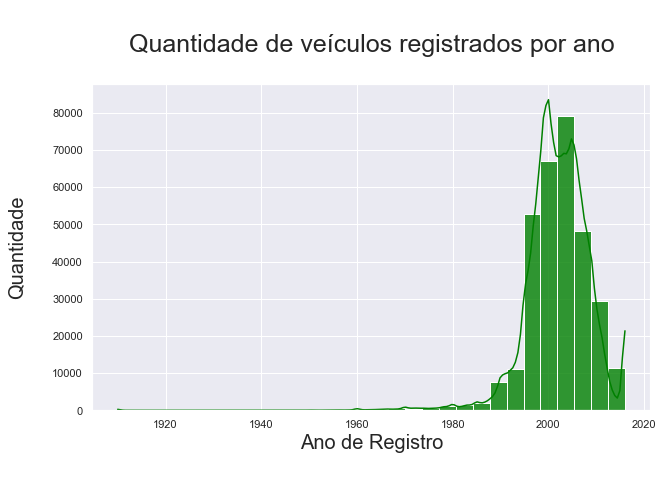

In [35]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 6))
grafico = sns.histplot(df['yearOfRegistration'], bins=30, color='green', kde=True, alpha=0.8)
ax.set_xlabel("Ano de Registro\n", size=20)
ax.set_ylabel("Quantidade\n", size=20)
ax.set_title("\nQuantidade de veículos registrados por ano\n", size=25)
plt.show()

Vemos que, de acordo com o dataset, do final dos anos 90 até meados dos anos 2000 foi onde teve uma maior quantidade de veículos registrados.

In [29]:
df['yearsOld'].value_counts()

16    24313
17    22704
11    21206
15    20063
13    19639
      ...  
96        1
69        1
89        1
80        1
70        1
Name: yearsOld, Length: 93, dtype: int64

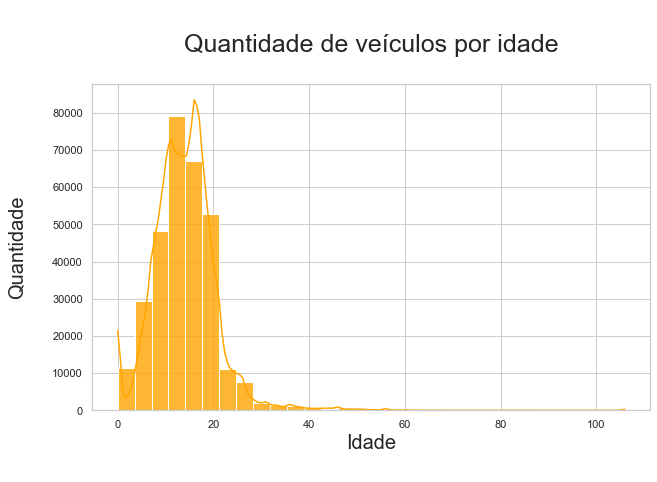

In [36]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (10, 6))
grafico = sns.histplot(df['yearsOld'], bins=30, color='orange', kde=True, alpha=0.8)
ax.set_xlabel("Idade\n", size=20)
ax.set_ylabel("Quantidade\n", size=20)
ax.set_title("\nQuantidade de veículos por idade\n", size=25)
plt.show()

In [34]:
df.gearbox.value_counts(1)

manuell        0.763063
automatik      0.183291
Unspecified    0.053646
Name: gearbox, dtype: float64

Essa relação mostra que o câmbio manual é presente em, aproximadamente, 76,31%. Já o automático em 18,33%.

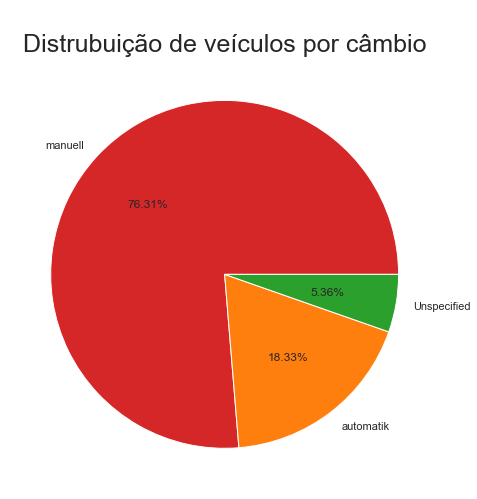

In [37]:
fig, ax = plt.subplots(figsize = (10, 8))
colors = ['tab:red', 'tab:orange', 'tab:green']
plt.pie(df.gearbox.value_counts(1), labels=df.gearbox.value_counts(1).index, autopct='%1.2f%%', colors=colors)
ax.set_title("\nDistrubuição de veículos por câmbio", size=25)
plt.show()

In [38]:
df.vehicleType.value_counts()

limousine     84077
kleinwagen    69334
kombi         60195
bus           26833
cabrio        20388
Other         19447
coupe         16920
suv           13585
andere         2908
Name: vehicleType, dtype: int64

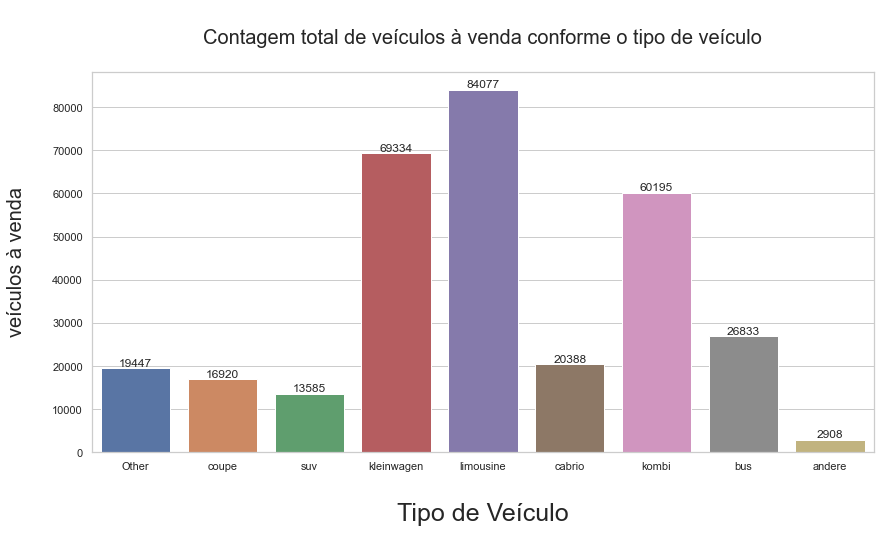

In [39]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (14, 7))
_ = sns.countplot(data=df, x='vehicleType')
ax.set_xlabel( "\nTipo de Veículo\n", size=25)
ax.set_ylabel( "veículos à venda\n", size=20)
ax.set_title( "\nContagem total de veículos à venda conforme o tipo de veículo\n", size=20)
plot = ax.bar_label(ax.containers[0], label_type='edge')

E este gráfico demonstra que, curiosamente, a limousine é o tipo de veículo que mais se faz presente em quantidade no nosso dataset.

# 4. Análise Bivariada
Agora iremos cruzar duas variáveis para sabermos suas relações:

In [15]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

# Variação da faixa de preço pelo tipo de veículo

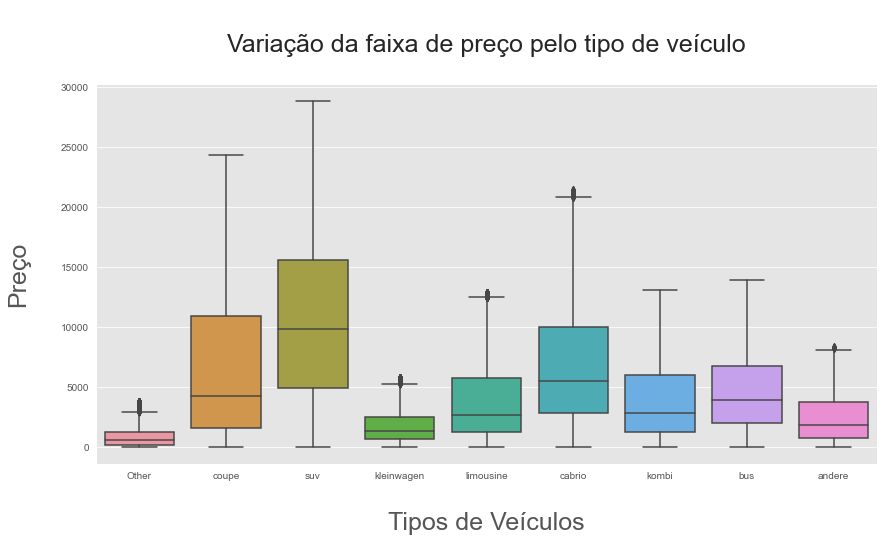

In [16]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (14, 7))
grafico = sns.boxplot(data=df, x='vehicleType', y='price')
ax.set_xlabel( "\nTipos de Veículos", size=25)
ax.set_ylabel( "Preço\n", size=25)
_ = ax.set_title( "\nVariação da faixa de preço pelo tipo de veículo\n", size=25)

Um gráfico de caixa (Box plot) é uma ótima forma de visualizarmos como os dados de uma certa coluna (atributo) estão distribuidos. Nele podemos visualizar a caixa colorida, mais conhecida como intervalo interquatílico, que contém os dados do primeiro quartil (Percentil 25) até o terceiro quartil (Percentil 75). Dentro dessa caixa há uma linha horizontal que representa a mediana. Além disso, podemos observar as linhas que se distanciam da caixa para lados opostos, elas representam a localização dos dados do terceiro quartil pra cima e do primeiro quartil para baixo. Também podemos observar a presença de pontos logo depois dessas linhas, eles são chamados de outliers (valores discrepantes), que são definidos a partir da multiplicação do intervalo interquartílico (Terceiro Quartil - Primeiro Quartil) vezes 1,5. Se houver valores no dataset maiores do que o resultado dessa operação adicionado ao valor do terceiro quartil, nós teremos os outliers superiores (o caso do grafico acima), mas se houver valores no dataset menores do que o valor do primeiro quartil subtraido do resultado dessa operação, teremos então outliers inferiores. É de extrema importância sabermos dos outliers presentes na nossa base de dados para que possamos deixar as nossas análises mais coerentes, dado que os valores discrepantes podem acabar nos enganando ao indicar valores não condizentes com o padrão.

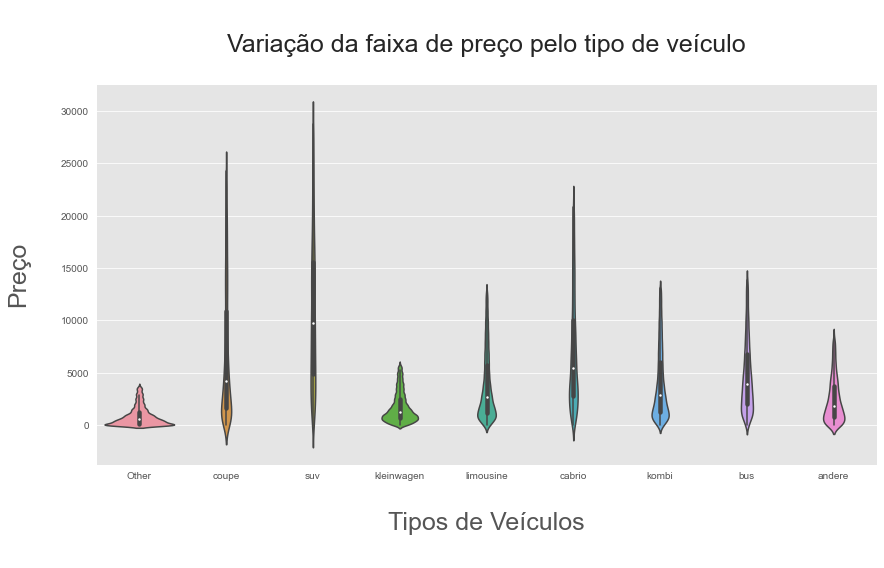

In [17]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (14, 7))
grafico = sns.violinplot(data=df, x='vehicleType', y='price')
ax.set_xlabel( "\nTipos de Veículos\n", size=25)
ax.set_ylabel( "Preço\n", size=25)
_ = ax.set_title( "\nVariação da faixa de preço pelo tipo de veículo\n", size=25)

O gráfico de violino (Violin plot) se baseia na mesma ideia do Box plot, mas ele consegue representar de uma forma melhor a densidade e distribuição dos valores. Resumindo, os dois gráficos são ótimos para a análise bivariada. Portanto, a conclusão que tiramos na análise desses dois gráficos é que o tipo de veículo _suv_ é o que mais possui disparidade de preços, já _other_ é o que mais apresenta preços similares. Também podemos aferir que a categoria _suv_ é a que, em média, possui os maiores preços, já que tem a maior mediana de todos os outros tipos de veículos. 

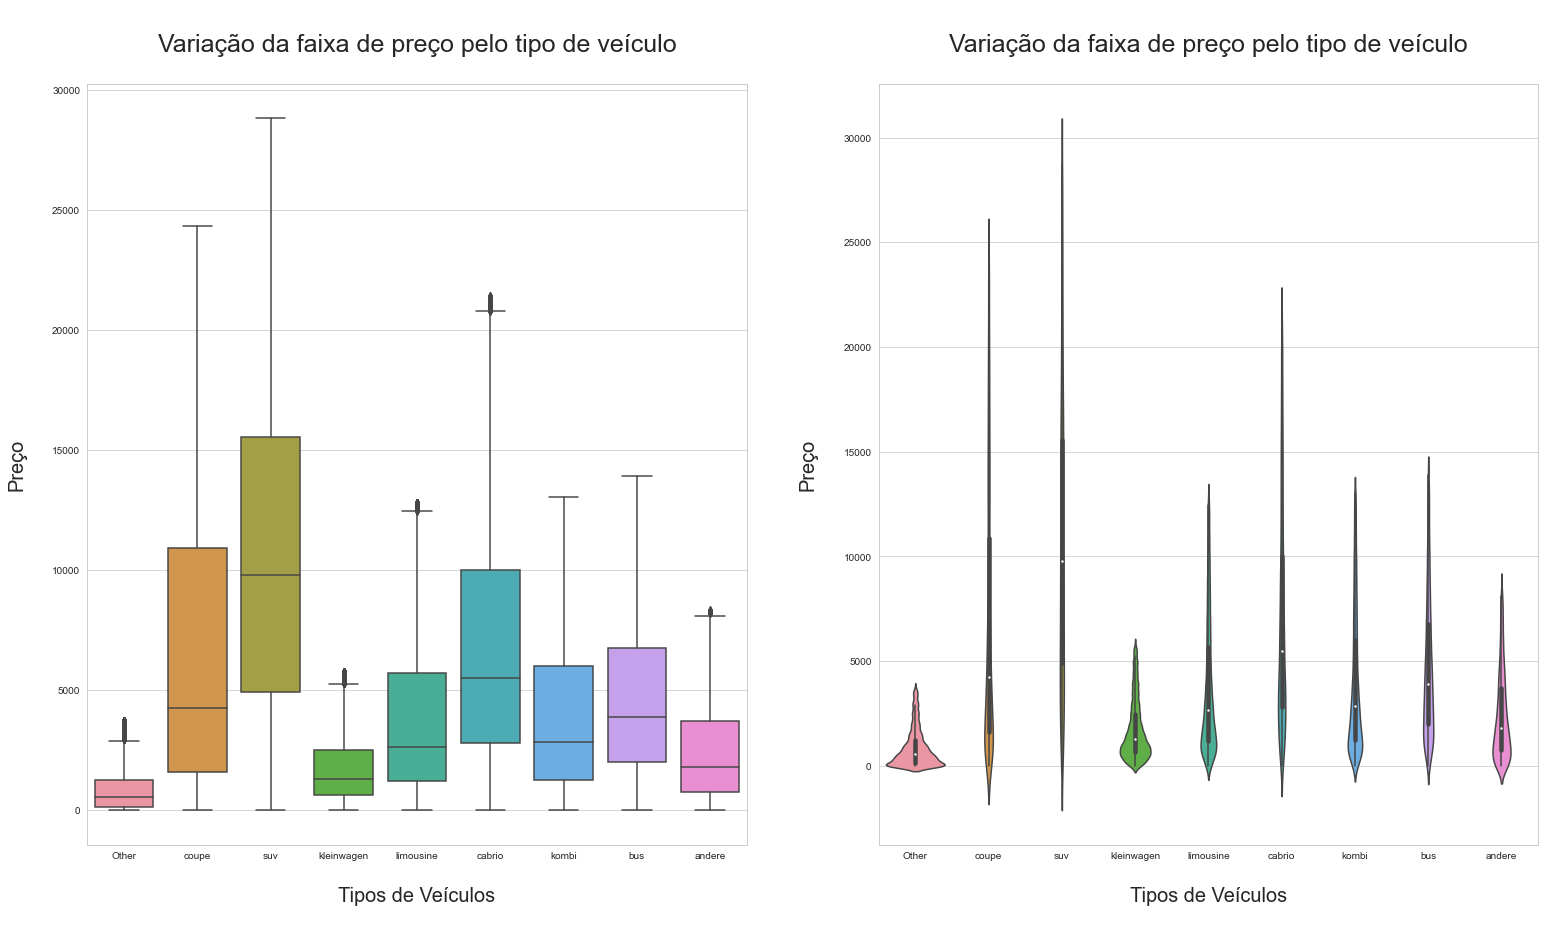

In [18]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 14))
sns.boxplot(data=df, x='vehicleType', y='price', ax=axes[0])
sns.violinplot(data=df, x='vehicleType', y='price', ax=axes[1])
axes[0].set_xlabel( "\nTipos de Veículos\n", size=20)
axes[0].set_ylabel( "Preço\n", size=20)
axes[0].set_title( "\nVariação da faixa de preço pelo tipo de veículo\n", size=25)
axes[1].set_xlabel( "\nTipos de Veículos", size=20)
axes[1].set_ylabel( "Preço\n", size=20)
axes[1].set_title( "\nVariação da faixa de preço pelo tipo de veículo\n", size=25)
plt.show()

E para finalizar, os dois gráficos um do lado do outro para demonstrar bem como os tipos de veículos estão distribuidos de acordo com seus preços.

# Preço de veículos pertencentes a cada marca

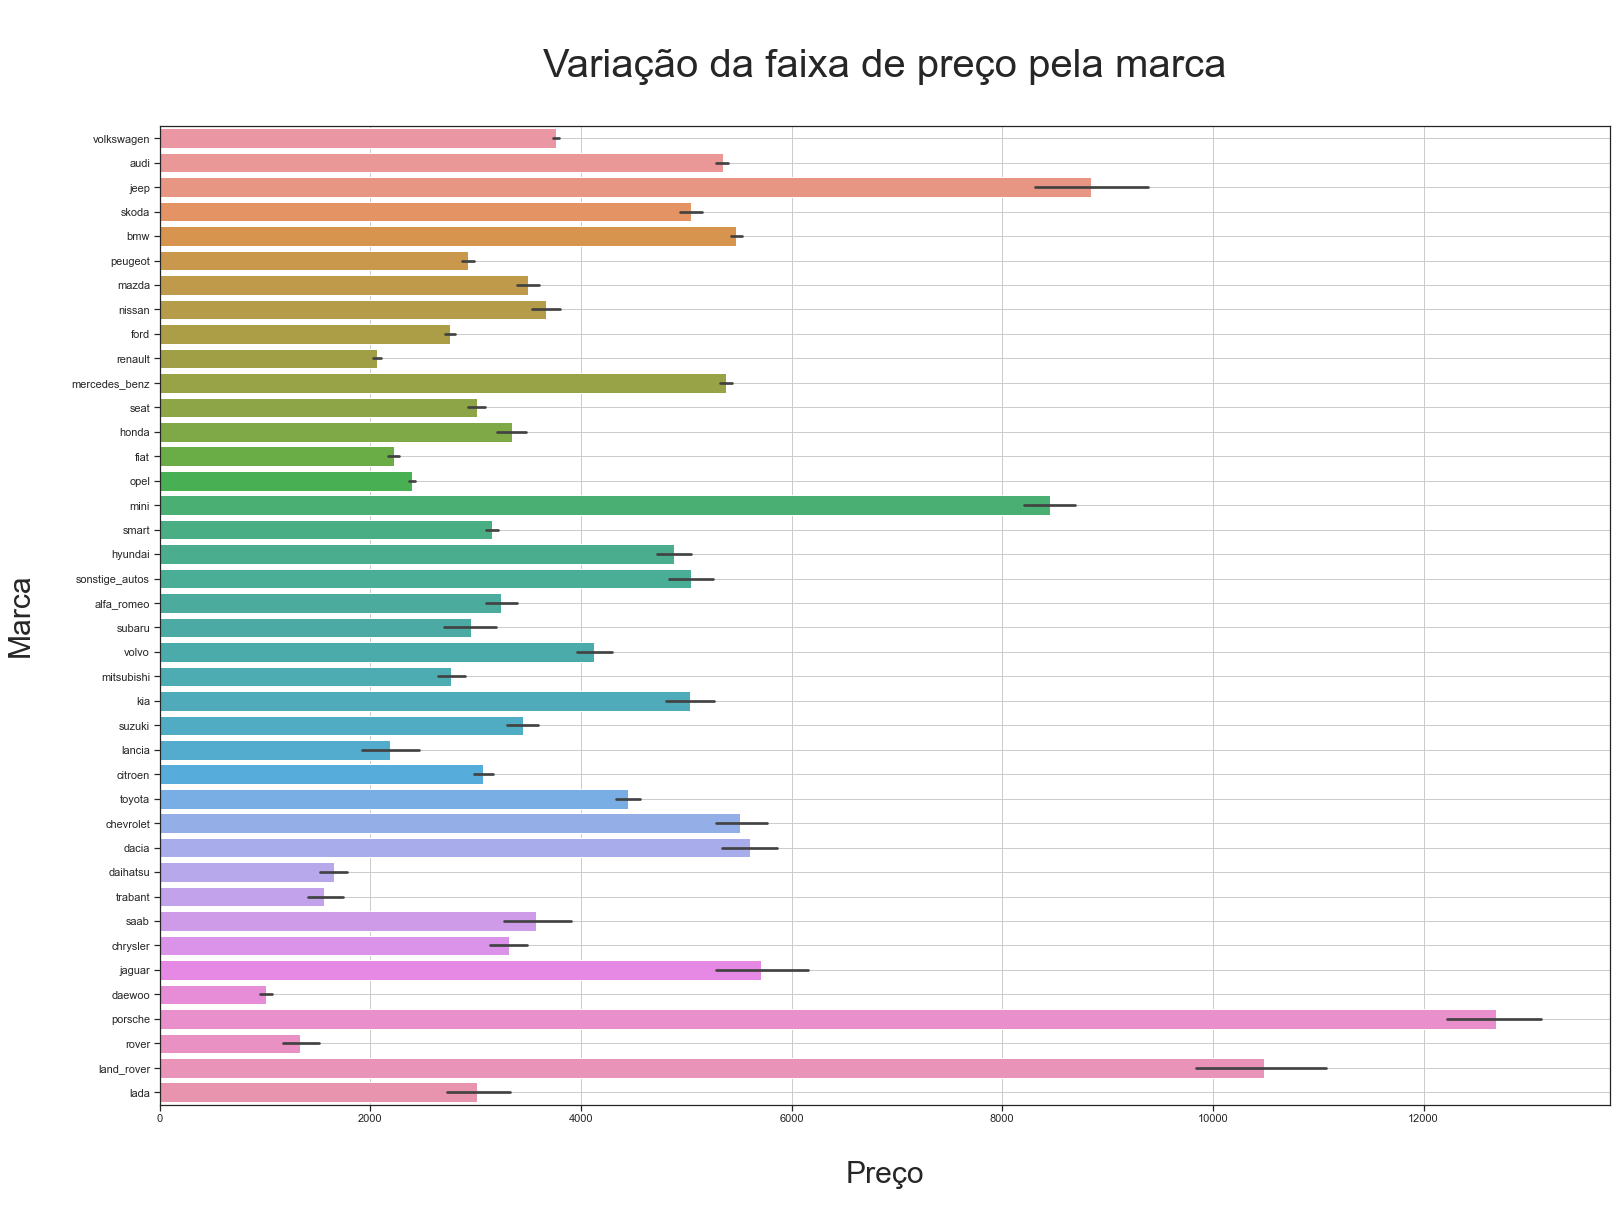

In [19]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize = (26, 18))
sns.barplot(data=df, x='price', y='brand')
ax.set_xlabel( "\nPreço\n", size=30)
ax.set_ylabel( "Marca\n", size=30)
ax.set_title( "\nVariação da faixa de preço pela marca\n", size=40)
plt.grid()

Esse gráfico de barras nos mostra as marcas que com maiores preços de veículos. Podemos observar que a marca _porsche_ é a que detém o posto de marca mais cara, seguido pela _land rover_. Um detalhe interessante a se analisar é a margem de erro que o gráfico nos proporciona, sendo o mesmo caracterizado pela linha preta no final das barras.

# Preço de veículos relacionado com a idade

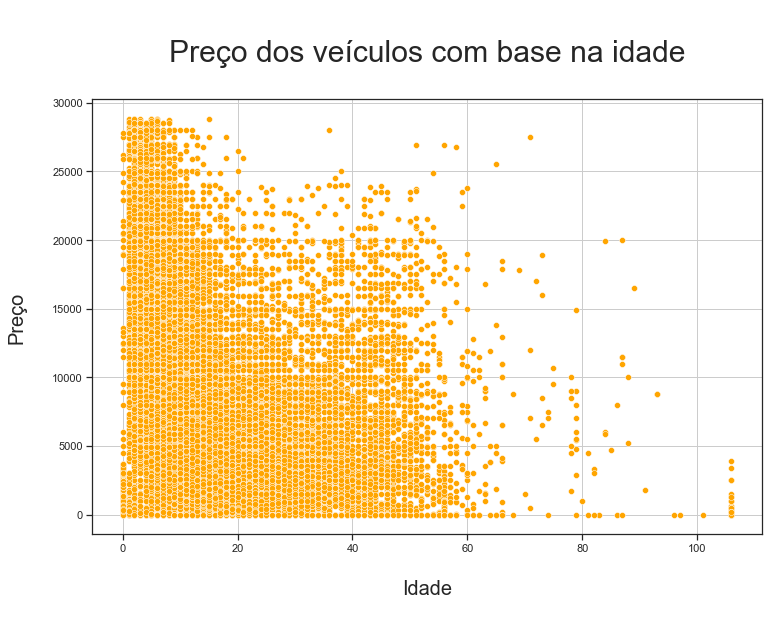

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x="yearsOld", y="price", data=df, alpha=1, color='orange')
ax.set_title("\nPreço dos veículos com base na idade\n", size=30)
ax.set_xlabel("\nIdade\n", size=20)
ax.set_ylabel("Preço\n", size=20)
plt.grid()
plt.show()

Com esse gráfico de dispersão conseguimos perceber que geralmente quando o veículo vai envelhecendo, o seu preço vai decaindo. Mas esse padrão não se aplica a todos os veículos, dado que alguns ainda são caros mesmo estando velhos.

# 5. Análise Multivariada

Por fim, cruzaremos mais de duas variáveis:

In [21]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

# Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

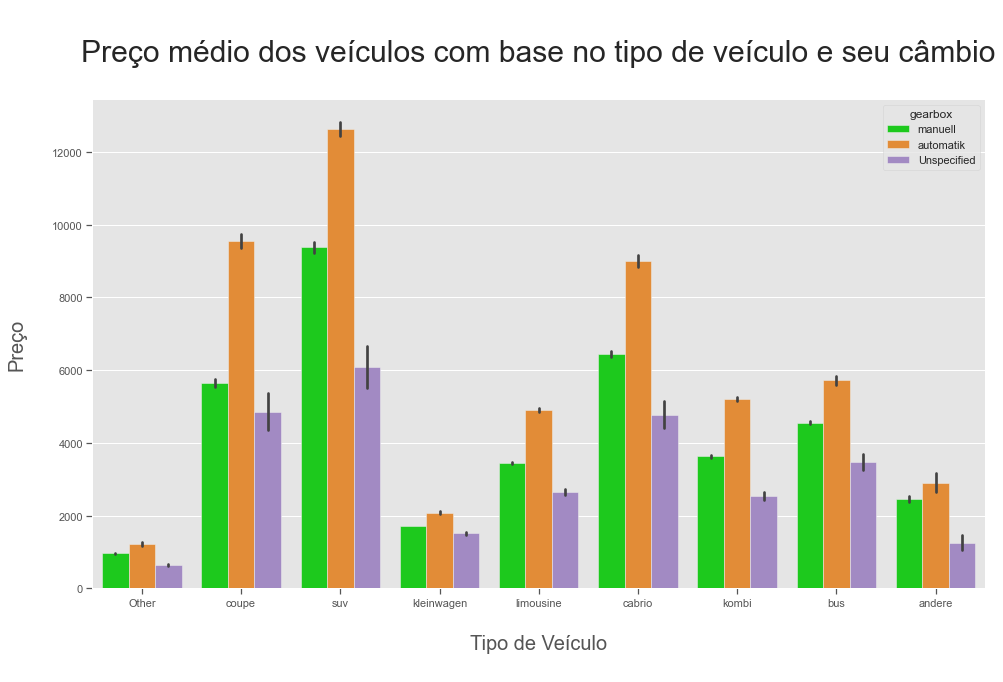

In [22]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16,9))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price", hue="gearbox", palette=colors, data=df, alpha=1)
ax.set_title("\nPreço médio dos veículos com base no tipo de veículo e seu câmbio\n", size=30)
ax.set_xlabel("\nTipo de Veículo\n", size=20)
ax.set_ylabel("Preço\n", size=20)
plt.show()

Com esse gráfico conseguimos analisar o preço de cada marca pelo seu câmbio. Percebemos que o mais caro é o _suv_ automático e logo em seguida aparece o _coupe_ automático empatado tecnicamente (dentro da margem de erro) com o _suv_ manual e com o _cabrio_ automático.

# Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

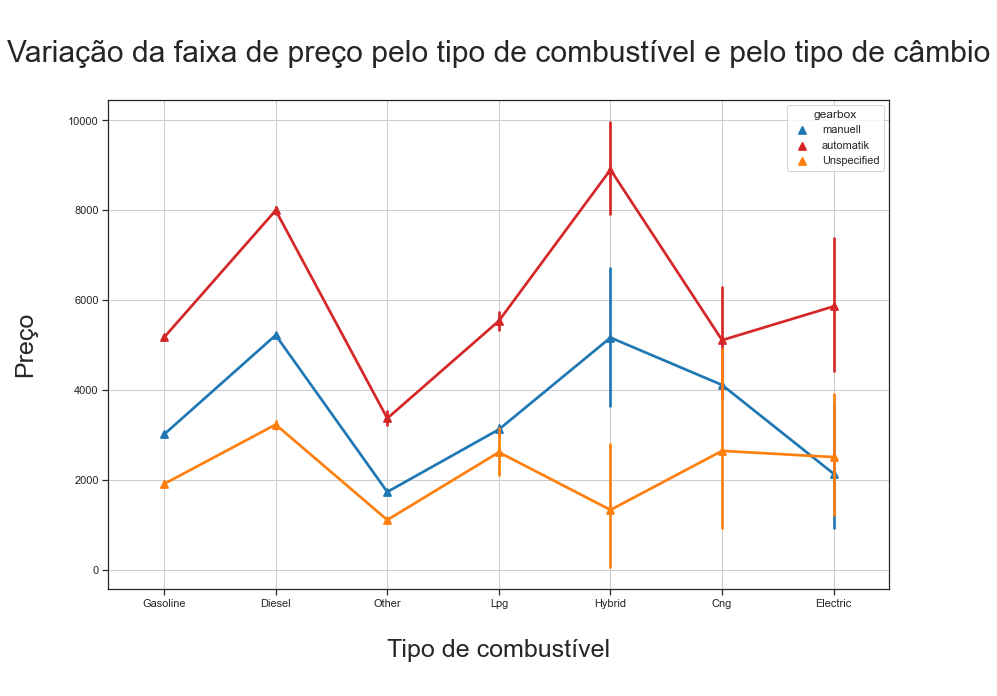

In [23]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize = (14, 9))
_ = sns.pointplot(data=df, y='price', x='fuelType', hue='gearbox', palette = {"manuell":"tab:blue",
                  "automatik":"tab:red", "Unspecified":"tab:orange"}, markers = '^',)
ax.set_xlabel( "\nTipo de combustível\n", size=25)
ax.set_ylabel( "Preço\n", size=25)
title = ax.set_title( "\nVariação da faixa de preço pelo tipo de combustível e pelo tipo de câmbio\n", size=30)
plt.grid()

Diante desse gráfico de pontos podemos observar que há uma grande margem de erro nos tipos de combustivel _Hybrid_, _Cng_ e _Eletric_, ou seja, os dados desses três podem não ser tão confiáveis devido à sua volatilidade.

# Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

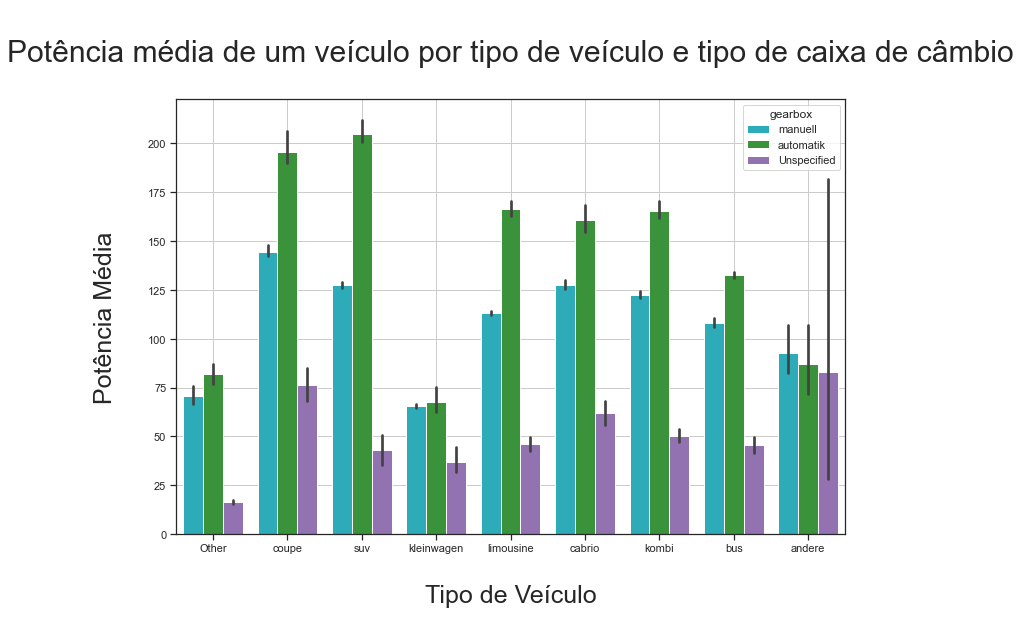

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))
_ = sns.barplot(data=df, y='powerPS', x='vehicleType', hue='gearbox', palette = {"manuell":"tab:cyan",
           "automatik":"tab:green", 
           "Unspecified":"tab:purple"})
ax.set_xlabel( "\nTipo de Veículo\n", size=25)
ax.set_ylabel( "Potência Média\n", size=25)
ax.set_title( "\nPotência média de um veículo por tipo de veículo e tipo de caixa de câmbio\n", size=30)
plt.grid()

Analisando o gráfico concluimos que o câmbio automático de quase todas as marcas possui um domínio de potência sobre os outros câmbios.

# Preço médio de um veículo por marca, bem como tipo de veículo

In [25]:
tabela = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        tabela = tabela.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
tabela = tabela.reset_index()
del tabela["index"]
tabela["avgPrice"].fillna(0,inplace=True)
tabela["avgPrice"].isnull().value_counts()
tabela["avgPrice"] = tabela["avgPrice"].astype(int)
tabela.head(10)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,kombi,3902
7,volkswagen,bus,5881
8,volkswagen,andere,2597
9,audi,Other,1012


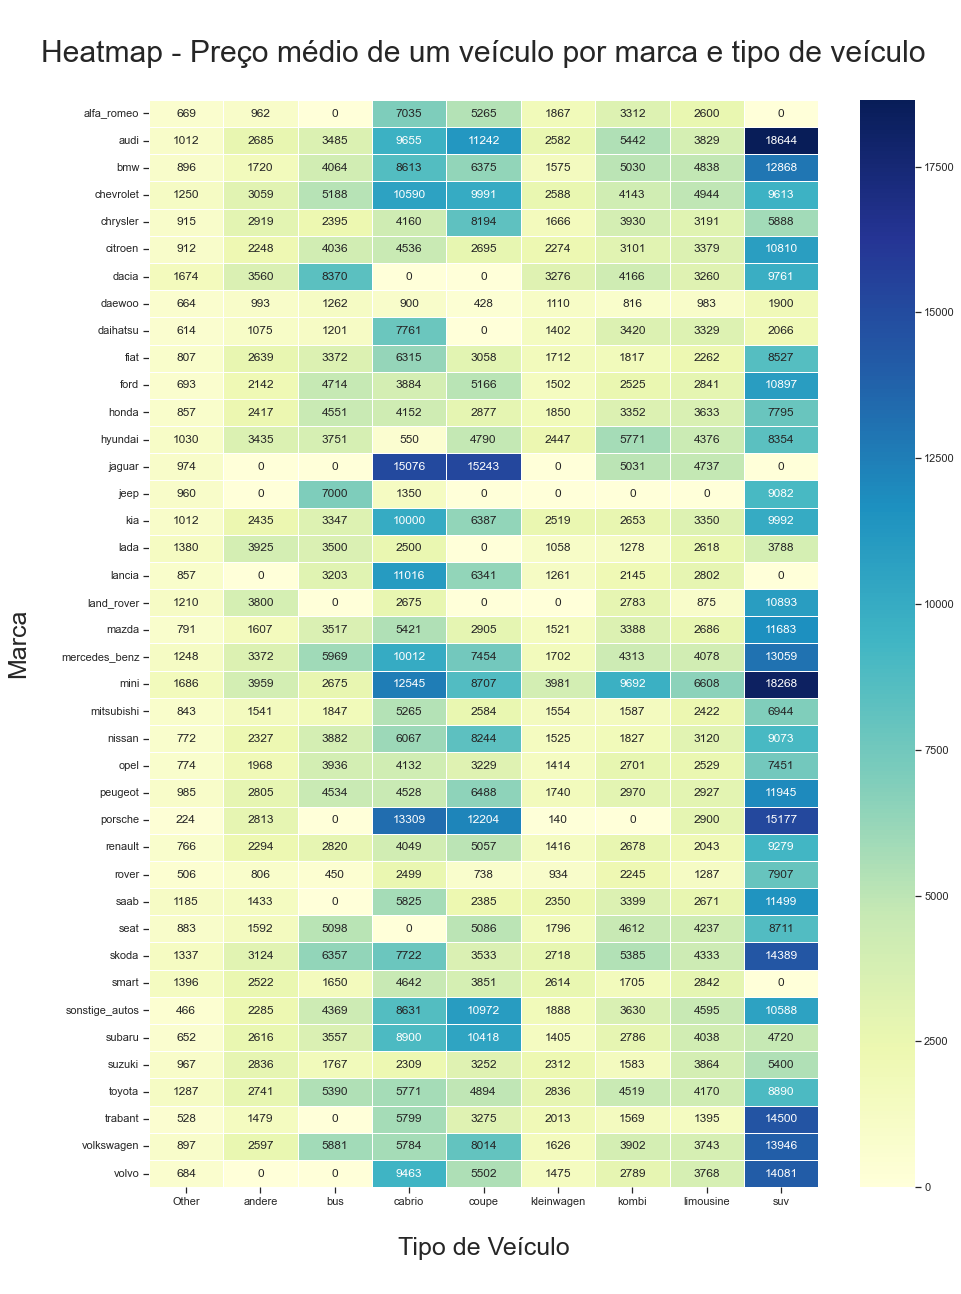

In [27]:
tab = tabela.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tab, linewidths=1, cmap="YlGnBu", annot=True, ax=ax, fmt="d")
ax.set_title("\nHeatmap - Preço médio de um veículo por marca e tipo de veículo\n",fontdict={'size':30})
ax.xaxis.set_label_text("\nTipo de Veículo\n",fontdict= {'size':25})
ax.yaxis.set_label_text("Marca\n",fontdict= {'size':25})
plt.show()

Esse mapa de calor demonstra bem o preço médio para cada tipo de veículo e marca. Por exemplo, a marca _audi_ tem o _suv_ mais caro de todos, já a marca _dacia_ tem o _bus_ como a mais cara.

# Mapa de calor de todas as variáveis e suas relações

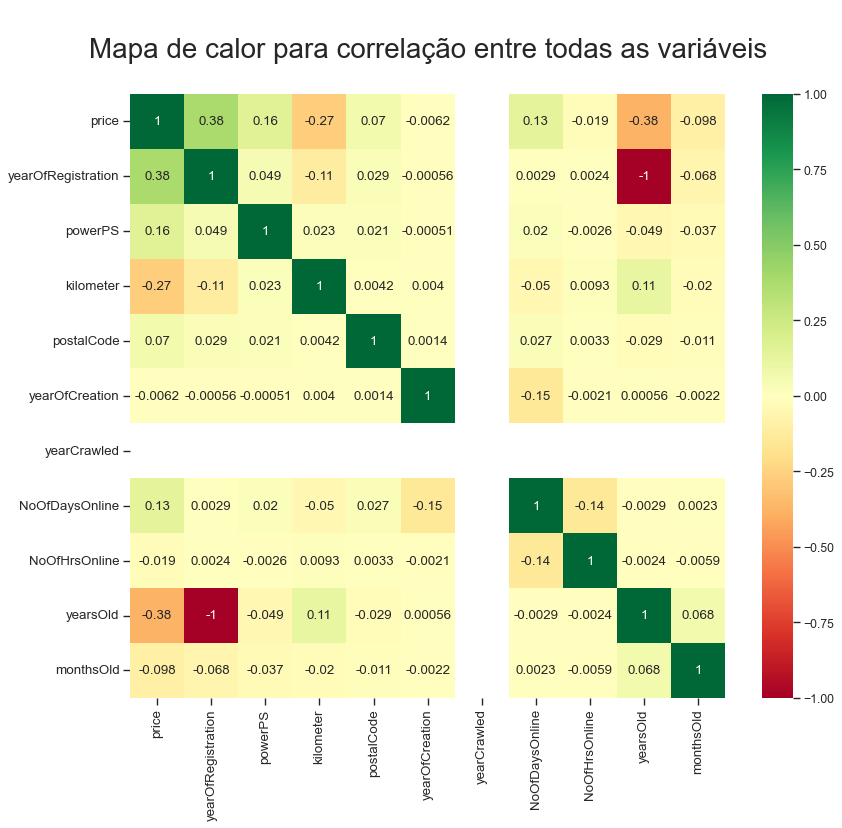

In [28]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('\nMapa de calor para correlação entre todas as variáveis\n', fontsize=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

O mapa de calor acima nos mostra a relação entre todas a variáveis quantitativas do dataset. Quanto mais próximo de 1 a relação tem, maior afinidade positiva essas variáveis tem, ou seja, quando uma cresce a outra cresce também. A mesma coisa serve para o contrário, quanto mais perto de -1 a relação tiver, maior afinidade negativa, ou seja, quando uma cresce, a outra decresce. E por fim, quanto mais próximo de 0 a relação tem, menos afinidade a relação vai ter, ou seja, as variáveis não tem uma conexão forte. Lembrando que as relações do mapa de calor acima são lineares, portanto, as variáveis ainda podem ter alguma relação mesmo com o coeficiente sendo 0.

# Conclusão

Antes de concluir a nossa análise, gostaria de reiterar que o Dataset no qual a minha análise exploratória foi baseada é público e está disponível no site https://www.kaggle.com/. Dito isso, foi realmente interesante ter explorado essa base de dados e ter exemplificado um pouco do como nós podemos usar o nosso conhecimento em estatística descritiva e programação de computadores para responder algumas perguntas de negócio e tirar alguns insights sobre os dados trabalhados. Portanto, fico grato a quem chegou até aqui e dedicou seu tempo seguindo a minha análise.